# Time-Speed Plot with Wind Direction

what date did you release flies (e.g. 20220804): 20230621
what time did you release flies (e.g. 142040): 123200
    time  wind_direction  math_direction  wind_speed
74  1232       20.974023       -1.936733    3.856554
75  1233       26.756979       -2.016816    3.795218
76  1234       44.438895       -1.812146    3.074973


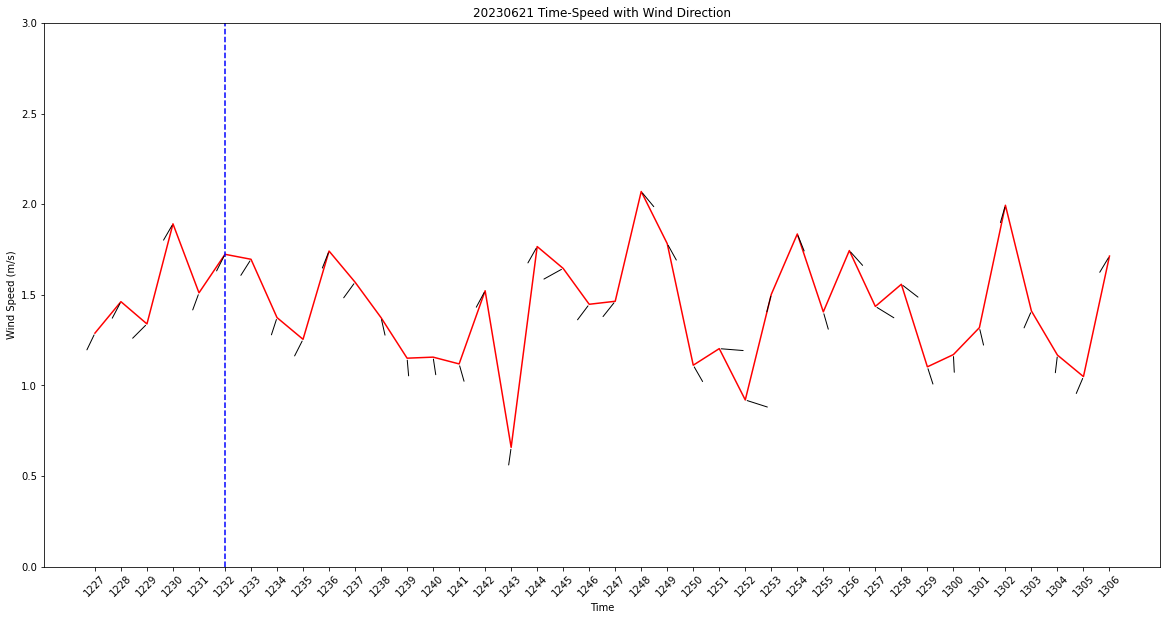

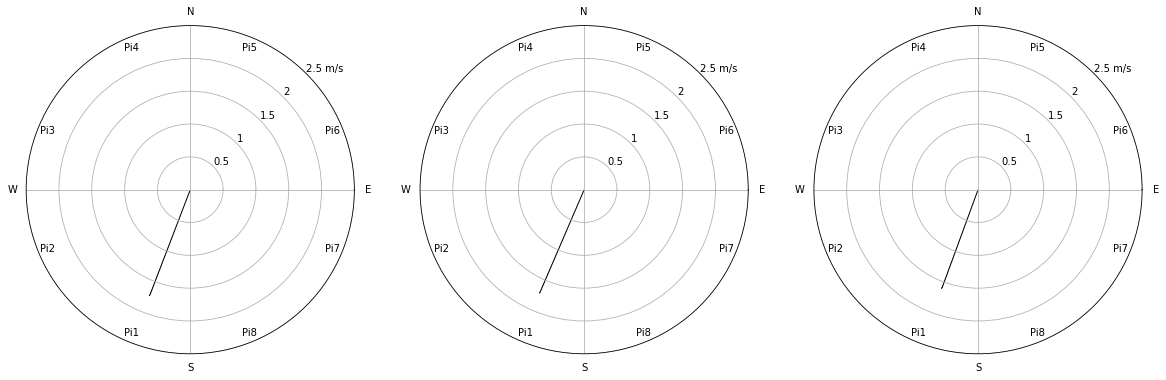

In [97]:
# 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
#data_path='/media/flyranch/data21/field_release/wind_data_files/anemometer_'
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True)




# with Heatmap

    time  wind_direction  math_direction  wind_speed
52  1015       56.923998       -2.566437    0.974148
53  1016       29.955670       -2.093058    0.766233
54  1017       51.510735       -2.383590    0.845879
trap10
trap9
trap8
trap7
trap6
trap5
trap4
trap3
trap2
trap1
trap12


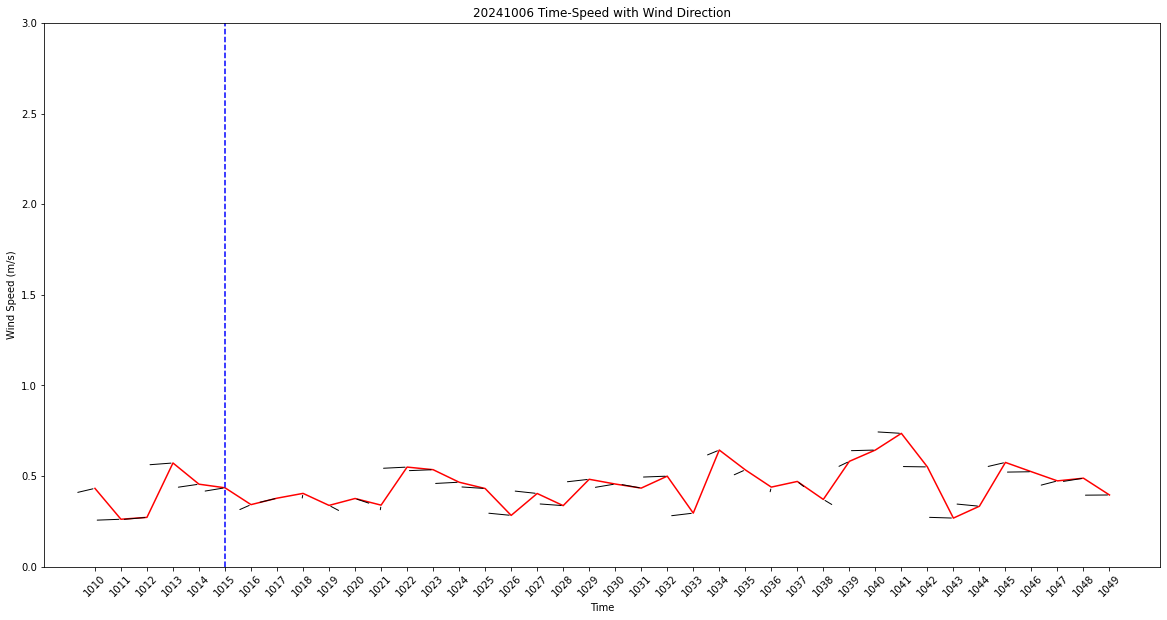

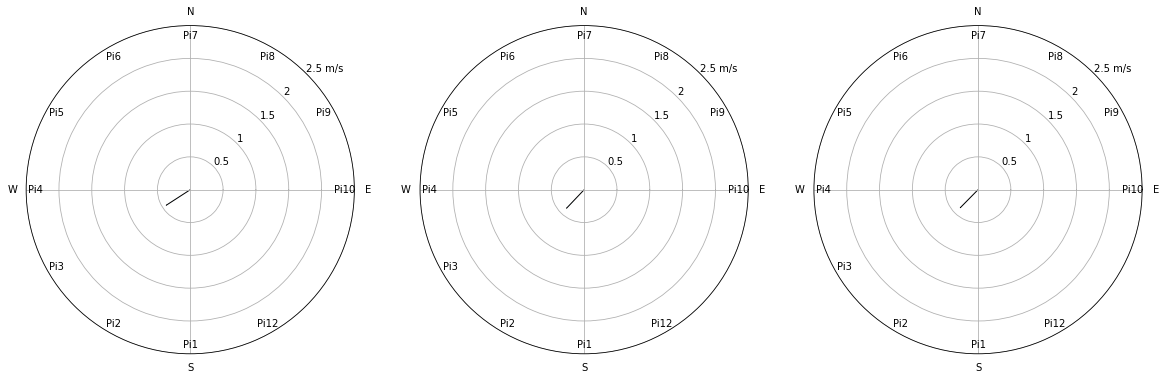

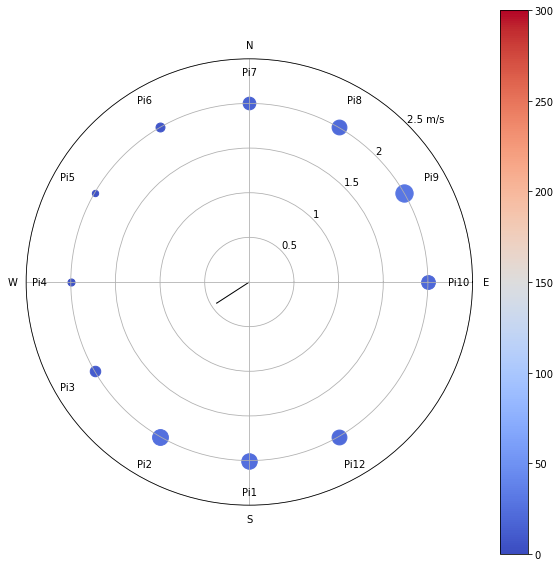

In [5]:
## 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
#date='20241006'
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#release='101551'
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
#data_path='/media/flyranch/data21/field_release/wind_data_files/anemometer_'
data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True)







fig2,ax2=plt.subplots(figsize=(10,10),subplot_kw={'projection':'polar'})

with open('/media/flyranch/14TB_Backup/field_release/field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()
'''
collection_list=[]
for pi in pi_name_lst:
    if 'trap'+str(pi) in data["collections"][date].keys():
        print('trap'+str(pi))
        collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

collection_list.append(0)
#test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
r_list=[2]*12
'''

if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()


elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        if not n==11:
            ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                     ha='center',va='center')
    plt.colorbar()

elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
plt.savefig(out_path+date+'_fly_collection_VS_initial_1_min_wind.pdf',transparent=True)


# Box and Whisker Plot for wind Data

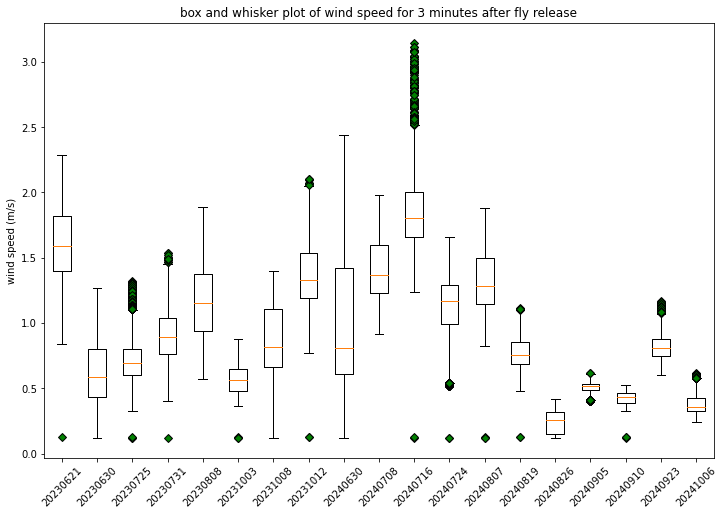

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib
##### box and whisker plot of wind speed for 3 minutes after fly release #####


date_list=["20230621","20230630","20230725","20230731","20230808","20231003",
           "20231008","20231012","20240630","20240708","20240716","20240724",
           "20240807","20240819","20240826","20240905","20240910","20240923","20241006"]
#"20220804","20220914","20220923"
#"20190706","20190611","20190508","20190419"
release_list=["123200","094055","113037","105622","094526","154610",
              "122251","135550","112239","090049","094420","082053",
              "074202","081047","082421","084649","082316","082010","101551"]
#"105542","113540","114246"
#"081100","074800","100400","115600"
#date=input("what date did you,release flies (e.g. 20220804): ")
#date="20230731"
#wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
#release="105622"
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"

data_list=[]

for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    #print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path="/media/flyranch/14TB_Backup/field_release/wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[2:4])*60+int(release[4:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")

out_path=data_path+"wind_data_plots/boxplot_for_wind_data.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path)

# Plot for All traps

10
12
1
2
3
4
5
6
7
8
9


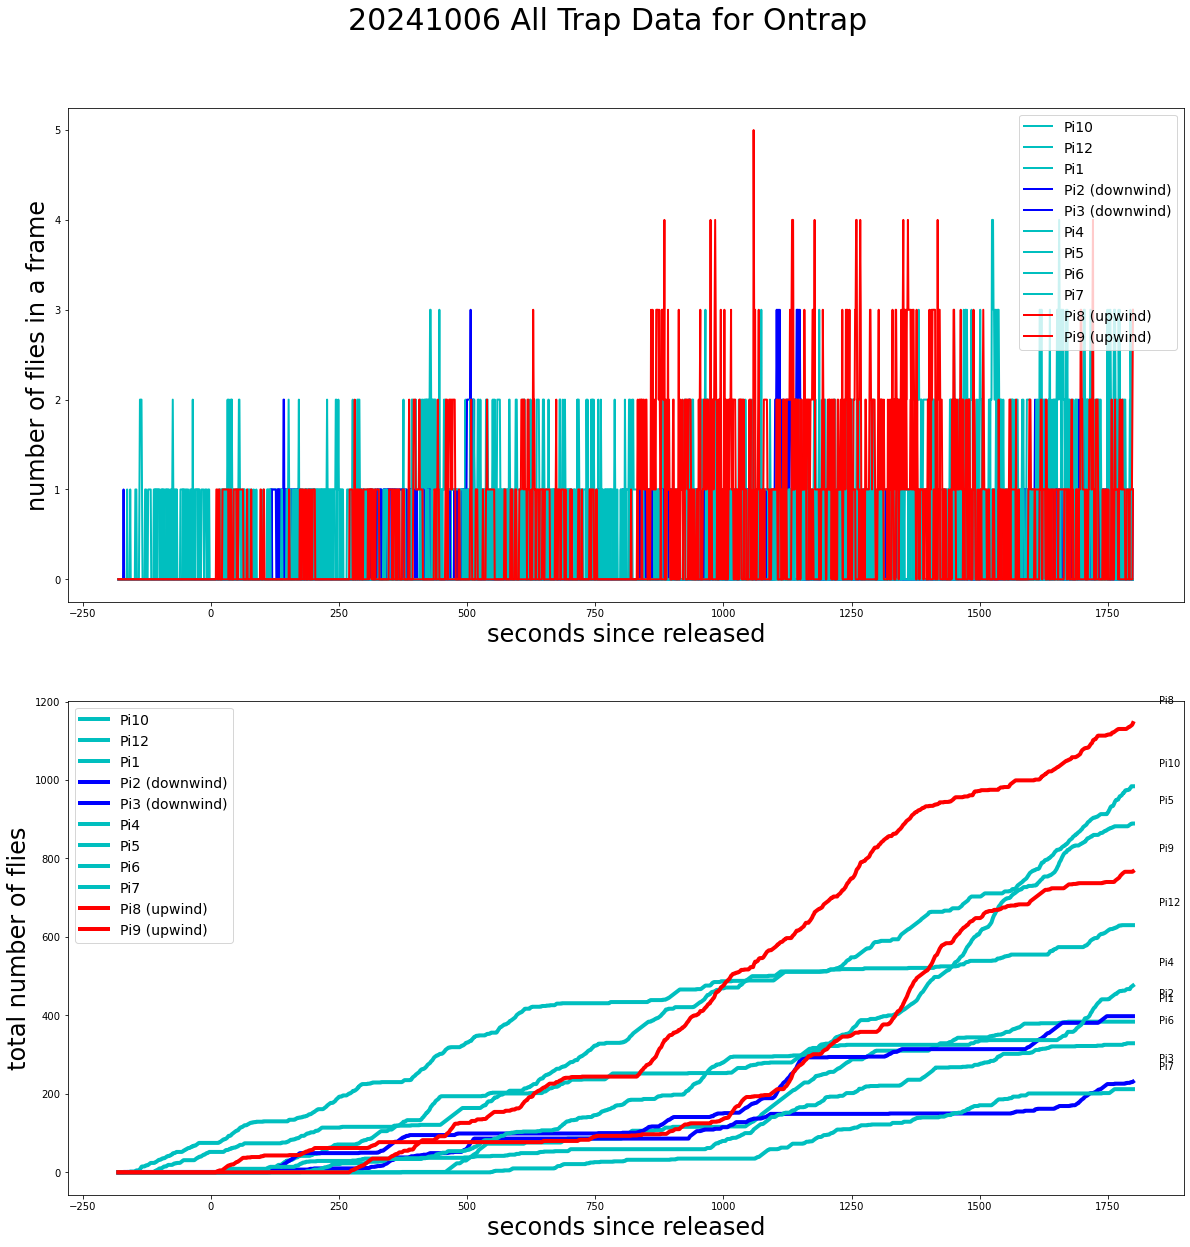

In [9]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20241006'
#release=input("What time flies were released? (e.g. 093425) :")
release='101551'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()

path='/media/flyranch/14TB_Backup/field_release/'
json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''
matplotlib.rcParams['pdf.fonttype'] = 42

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,20))
fig.suptitle(date+' All Trap Data for Ontrap',size=30,x=0.5,y=0.95)
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#pdb.set_trace()

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)



    #print(on_trap_acc_list)
    #print(Y_)
    #print(sec_since_release_list)


    #ax1.plot(sec_since_release_list, on_trap_list, '-',markersize=6,label='trap_'+trap_name)
    #ax2.plot(actual_timestamp_list, in_trap_list, '-',markersize=6,color="b",label="in trap")
    #ax1.legend(loc="upper right",fontsize=14)

    ###to smooth line plots
    #cubic_interploation_model = interp1d(sec_since_release_list, on_trap_list, kind = "cubic")
    #X_Y_Spline = make_interp_spline(sec_since_release_list, on_trap_list)
    # Plotting the Graph
    #X_=np.linspace(np.array(sec_since_release_list).min(), np.array(sec_since_release_list).max(), 500)
    #Y_=cubic_interploation_model(X_)
    #Y_=X_Y_Spline(X_)

    #for i in range(len(w_lst)):
    #    if w_lst[i][0][0]==int(t_name[-1]):
    
    if int(t_name[2:]) in upwind_list:
        Color='r'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (upwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (upwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    elif int(t_name[2:]) in downwind_list:
        Color='b'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (downwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (downwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    else:
        Color='c'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #print(Color)
    #ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    ax1.legend(loc="upper right",fontsize=14)
    ax1.set_xlabel('seconds since released',size=24)
    ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    ax2.legend(loc="upper left",fontsize=14)
    ax2.set_xlabel('seconds since released',size=24)
    ax2.set_ylabel('total number of flies',size=24)

'''
        elif w_lst[i][0][1]==int(t_name[-1]):
            ax1.plot(X_,Y_,'--',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
            #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
            ax1.legend(loc="upper right",fontsize=14)
            ax1.set_xlabel('seconds since released',size=24)
            ax1.set_ylabel('number of flies in a frame',size=24)


            ax2.plot(sec_since_release_list,on_trap_acc_list,'--',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
            ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
            ax2.legend(loc="upper left",fontsize=14)
            ax2.set_xlabel('seconds since released',size=24)
            ax2.set_ylabel('total number of flies',size=24)
'''

    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    #ax1.legend(loc="upper right",fontsize=14)
    #ax1.set_xlabel('seconds since released',size=24)
    #ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #ax2.legend(loc="upper left",fontsize=14)
    #ax2.set_xlabel('seconds since released',size=24)
    #ax2.set_ylabel('total number of flies',size=24)

    #c+=1


#data_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=data_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.jpg')
#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
isExist = os.path.exists(ex_path)

if not isExist:  
  # Create a new directory because it does not exist 
    os.makedirs(ex_path)

plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True)


# command to make a video from images

In [ ]:
ffmpeg -start_number 1461 -i /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/tl_0000_%04d.jpg -c:v libx264 -pix_fmt yuv420p -r 5 /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/output_3.mp4
    
    
    

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys





# to name output file
ind=0

fig=plt.figure()
ax=plt.axes()
#fig,ax=plt.subplots()

# to set range xlim, ylim
plt.xlim(-60,500)
plt.ylim(-0.5,16)

#x=np.linspace(-60,500)
#y=np.linspace(-0.5,16)

# set labels
plt.xlabel('Time (sec)')
plt.ylabel('Flies at Trap')

#ax.set_xlabel('time since release (sec)')
#ax.set_ylabel('flies at trap')

#set dark back ground
#plt.style.use('dark_background')
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')

# set thick param and label color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white') 


#in advance, plot data till 360 sec
plt.plot(sec_since_release_list[:55], on_trap_list[:55], '-',markersize=6,color="r",label="on trap")
plt.savefig(+str(0)+'.svg')
#pdb.set_trace()

# 360 sec to 760 sec
for i in range(len(sec_since_release_list[:282])):
	plt.plot(sec_since_release_list[55:i], on_trap_list[55:i], '-',markersize=6,color="r",label="on trap")
	plt.savefig(+str(ind)+'.svg')
	ind+=1


plt.savefig(+str(ind)+'.svg',dpi=600)